Short project:
https://www.coursera.org/learn/machine-learning-with-chatgpt-image-classification-model/home/welcome

Use ChatGPT to generate machine learning model, alter it, and see results. This solves the MNIST problem with Keras.

# Model 1
Prompt:
> Write Python code of a neural network to solve the MNIST problem using Keras using fully connected layers and categorical crossentropy as the loss function. Include model evaluation on the test set. Use 20% of the training set as a validation set.

Add a time check and results

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import time

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Flatten the 28x28 input images
    Dense(128, activation='relu'),      # Fully connected layer with 128 units and ReLU activation
    Dense(64, activation='relu'),       # Fully connected layer with 64 units and ReLU activation
    Dense(10, activation='softmax')     # Output layer with 10 units (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_train_time = time.time()

# Train the model with the training data and validate using the validation data
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

train_time = time.time() - start_train_time
print(f'Train time: {train_time}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

model_1_results = [model, x_test, y_test, history, test_loss, test_accuracy, train_time]

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2694 - accuracy: 0.9211 - val_loss: 0.1366 - val_accuracy: 0.9570
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1198 - accuracy: 0.9641 - val_loss: 0.1139 - val_accuracy: 0.9647
Epoch 3/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0816 - accuracy: 0.9744 - val_loss: 0.1026 - val_accuracy: 0.9682
Epoch 4/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0624 - accuracy: 0.9809 - val_loss: 0.0950 - val_accuracy: 0.9728
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0473 - accuracy: 0.9844 - val_loss: 0.1033 - val_accuracy: 0.9716
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0402 - accuracy: 0.9870 - val_loss: 0.0851 - val_accuracy: 0.9755
Epoch 7/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0943 - val_

Prompts to plot the training and test loss using matplotlib, and plots correct and incorrect predictions... make into functions.

In [16]:
import matplotlib.pyplot as plt
import random


def plot_training_test_loss(history):
    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    ax = plt.gca()
    ax.set_ylim([0, 0.28])

    plt.show()


def plot_predictions(model, x_test, y_test, history, one_hot=False):
    # Evaluate the model on the test set to find predictions
    predictions = model.predict(x_test)
    predicted_labels = np.argmax(predictions, axis=1)
    actual_labels = y_test

    if one_hot:
        actual_labels = np.argmax(y_test, axis=1)

    # Find correct and incorrect predictions
    correct_indices = np.where(predicted_labels == actual_labels)[0]
    incorrect_indices = np.where(predicted_labels != actual_labels)[0]

    # Randomly select 4 correct and 4 incorrect predictions if available
    num_samples = 4
    correct_samples = random.sample(list(correct_indices), min(num_samples, len(correct_indices)))
    incorrect_samples = random.sample(list(incorrect_indices), min(num_samples, len(incorrect_indices)))

    # Plot correct predictions
    plt.figure(figsize=(12, 6))
    for i, index in enumerate(correct_samples):
        image = x_test[index].reshape(28, 28)
        actual_label = actual_labels[index]
        predicted_label = predicted_labels[index]

        plt.subplot(2, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}', color='green')
        plt.axis('off')

    # Plot incorrect predictions
    for i, index in enumerate(incorrect_samples):
        image = x_test[index].reshape(28, 28)
        actual_label = actual_labels[index]
        predicted_label = predicted_labels[index]

        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}', color='red')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

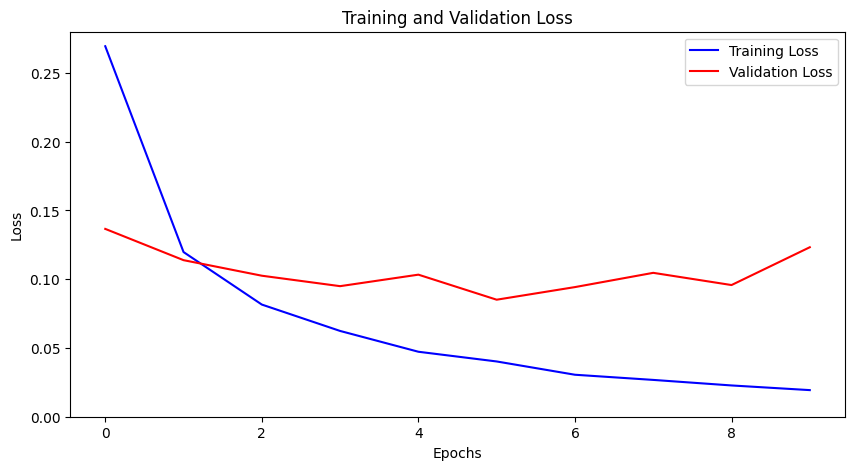

313/313 [==============================] - 5s 15ms/step


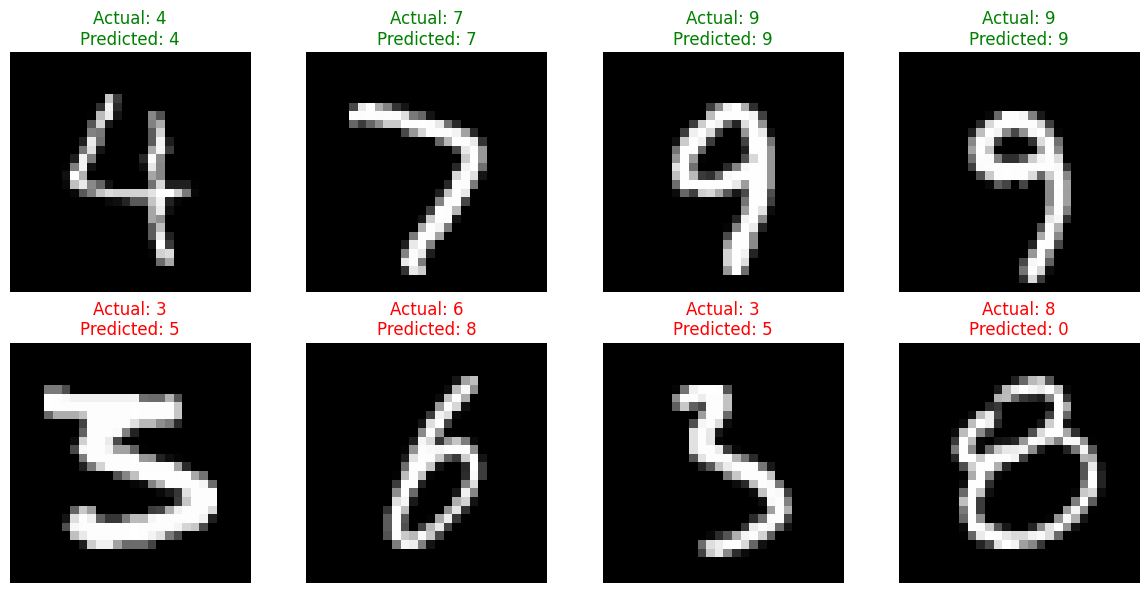

In [18]:
plot_training_test_loss(model_1_results[3])
plot_predictions(*model_1_results[:4], one_hot=True)

# Model 2
Prompt:
> Change the loss function to be sparse categorical crossentropy

Reuse previous model, and include changes made by ChatGPT

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import time

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# # Convert labels to one-hot encoded vectors
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Flatten the 28x28 input images
    Dense(128, activation='relu'),      # Fully connected layer with 128 units and ReLU activation
    Dense(64, activation='relu'),       # Fully connected layer with 64 units and ReLU activation
    Dense(10, activation='softmax')     # Output layer with 10 units (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_train_time = time.time()

# Train the model with the training data and validate using the validation data
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

train_time = time.time() - start_train_time
print(f'Train time: {train_time}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

model_2_results = [model, x_test, y_test, history, test_loss, test_accuracy, train_time]

Epoch 1/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2629 - accuracy: 0.9222 - val_loss: 0.1286 - val_accuracy: 0.9619
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1116 - accuracy: 0.9657 - val_loss: 0.1068 - val_accuracy: 0.9666
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0774 - accuracy: 0.9753 - val_loss: 0.1024 - val_accuracy: 0.9701
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0582 - accuracy: 0.9814 - val_loss: 0.0970 - val_accuracy: 0.9715
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0458 - accuracy: 0.9846 - val_loss: 0.0976 - val_accuracy: 0.9734
Epoch 6/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0366 - accuracy: 0.9878 - val_loss: 0.1079 - val_accuracy: 0.9707
Epoch 7/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0923 - val

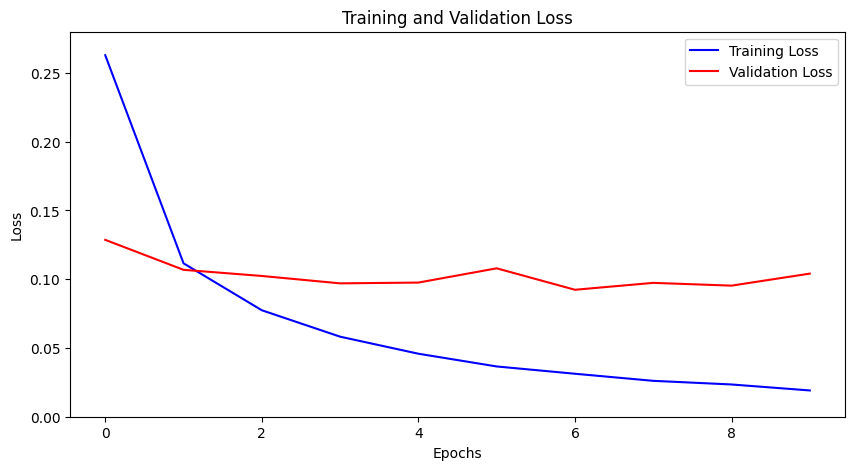

313/313 [==============================] - 5s 16ms/step


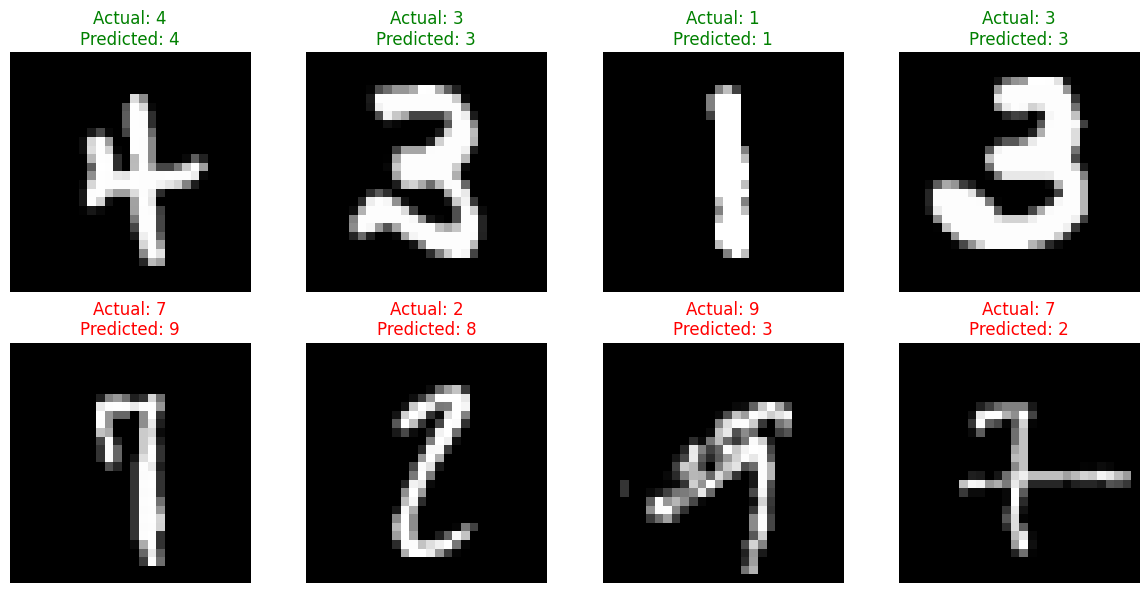

In [24]:
plot_training_test_loss(model_2_results[3])
plot_predictions(*model_2_results[:4], one_hot=False)

# Model 3
Prompt:
> Use convolutional layers

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension for Conv2D layers
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build the neural network model with convolutional layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_train_time = time.time()

# Train the model with the training data and validate using the validation data
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

train_time = time.time() - start_train_time
print(f'Train time: {train_time}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

model_3_results = [model, x_test, y_test, history, test_loss, test_accuracy, train_time]

Epoch 1/10
1500/1500 [==============================] - 120s 79ms/step - loss: 0.1332 - accuracy: 0.9590 - val_loss: 0.0595 - val_accuracy: 0.9818
Epoch 2/10
1500/1500 [==============================] - 115s 76ms/step - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.0503 - val_accuracy: 0.9838
Epoch 3/10
1500/1500 [==============================] - 116s 78ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0492 - val_accuracy: 0.9858
Epoch 4/10
1500/1500 [==============================] - 119s 79ms/step - loss: 0.0194 - accuracy: 0.9933 - val_loss: 0.0429 - val_accuracy: 0.9878
Epoch 5/10
1500/1500 [==============================] - 113s 76ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0480 - val_accuracy: 0.9867
Epoch 6/10
1500/1500 [==============================] - 121s 81ms/step - loss: 0.0108 - accuracy: 0.9961 - val_loss: 0.0741 - val_accuracy: 0.9824
Epoch 7/10
1500/1500 [==============================] - 115s 77ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0

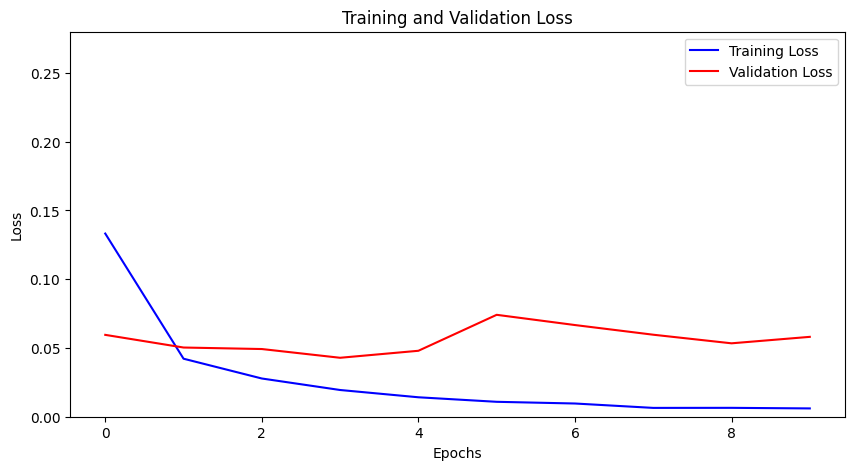

313/313 [==============================] - 9s 29ms/step


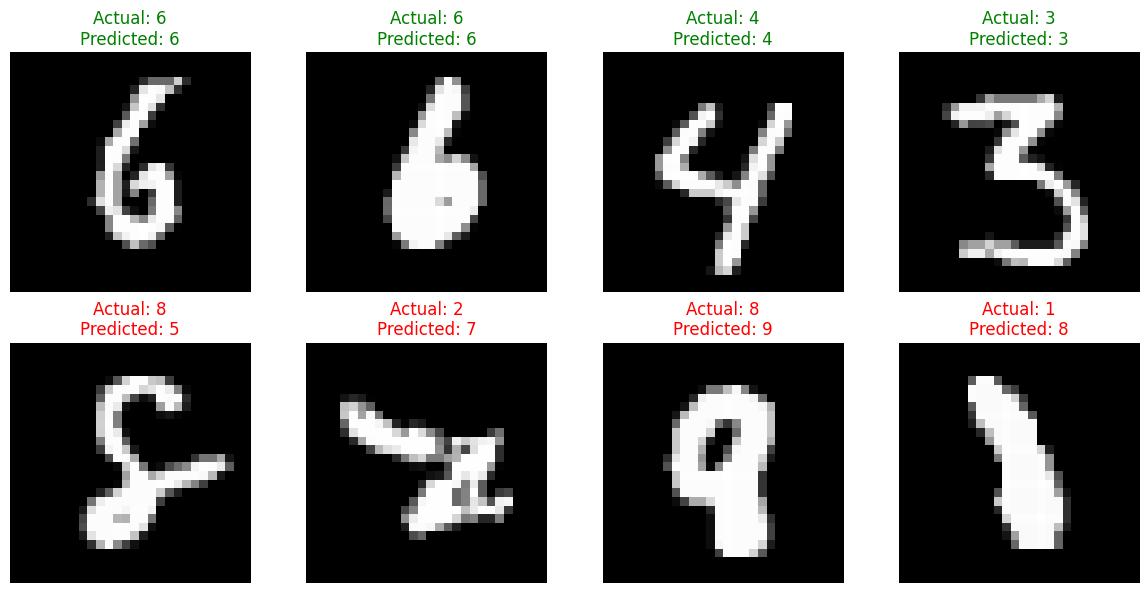

In [29]:
plot_training_test_loss(model_3_results[3])
plot_predictions(*model_3_results[:4], one_hot=False)

# Model 4
Add another convolutional layer and dropout layer

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension for Conv2D layers
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build the neural network model with convolutional layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train time is 1493, about 24min
start_train_time = time.time()

# Train the model with the training data and validate using the validation data
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

train_time = time.time() - start_train_time
print(f'Train time: {train_time}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

model_4_results = [model, x_test, y_test, history, test_loss, test_accuracy, train_time]

Epoch 1/10
1500/1500 [==============================] - 109s 72ms/step - loss: 0.3010 - accuracy: 0.9061 - val_loss: 0.0624 - val_accuracy: 0.9812
Epoch 2/10
1500/1500 [==============================] - 109s 73ms/step - loss: 0.0941 - accuracy: 0.9738 - val_loss: 0.0450 - val_accuracy: 0.9872
Epoch 3/10
1500/1500 [==============================] - 108s 72ms/step - loss: 0.0708 - accuracy: 0.9809 - val_loss: 0.0403 - val_accuracy: 0.9880
Epoch 4/10
1500/1500 [==============================] - 110s 73ms/step - loss: 0.0546 - accuracy: 0.9846 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 5/10
1500/1500 [==============================] - 107s 72ms/step - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.0391 - val_accuracy: 0.9908
Epoch 6/10
1500/1500 [==============================] - 112s 75ms/step - loss: 0.0363 - accuracy: 0.9896 - val_loss: 0.0378 - val_accuracy: 0.9914
Epoch 7/10
1500/1500 [==============================] - 115s 77ms/step - loss: 0.0338 - accuracy: 0.9906 - val_loss: 0

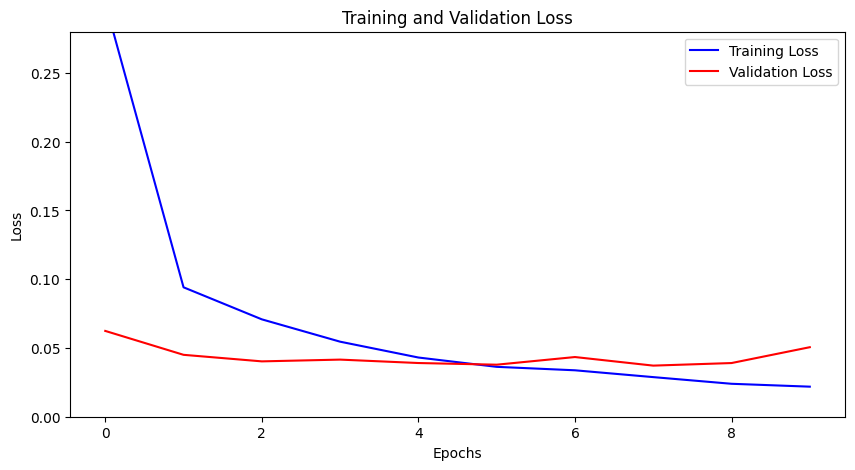

313/313 [==============================] - 9s 29ms/step


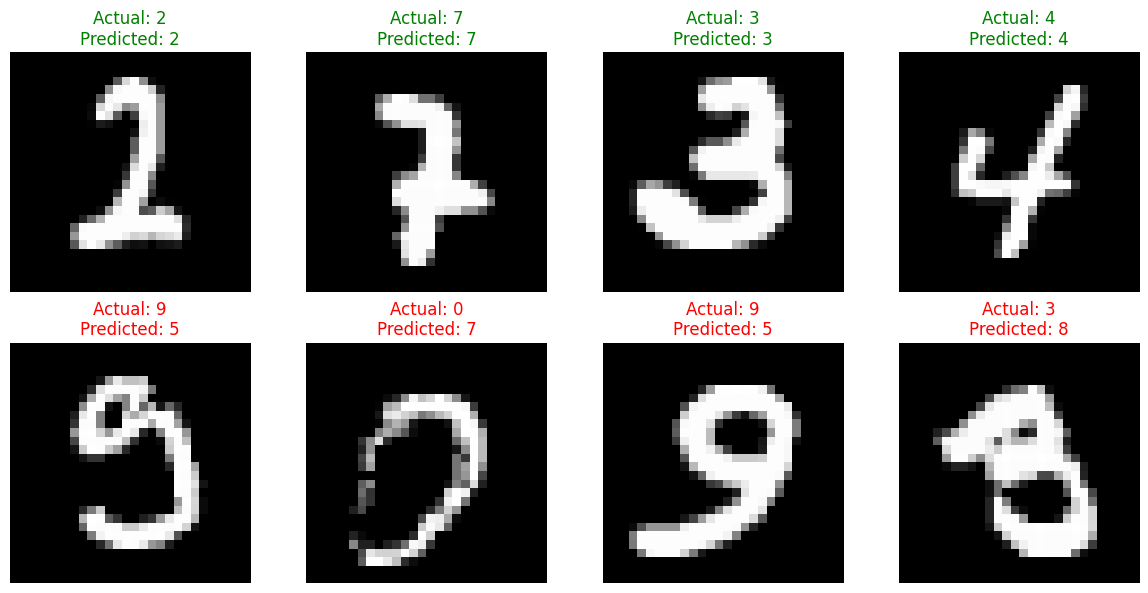

In [30]:
plot_training_test_loss(model_4_results[3])
plot_predictions(*model_4_results[:4], one_hot=False)

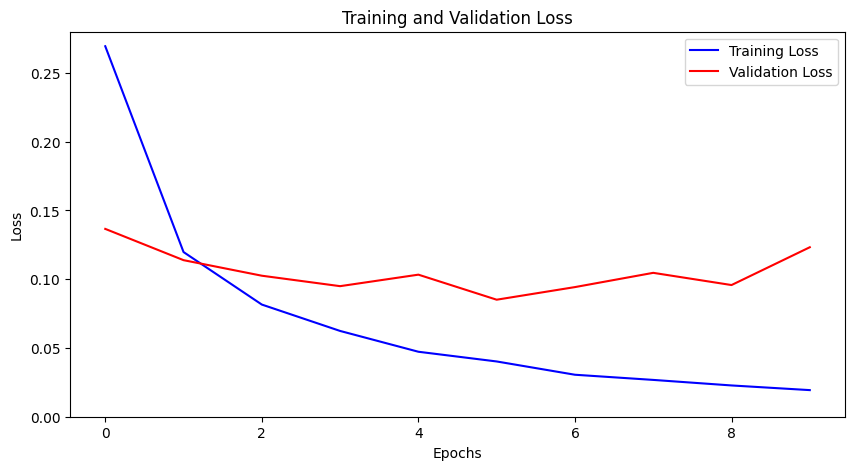

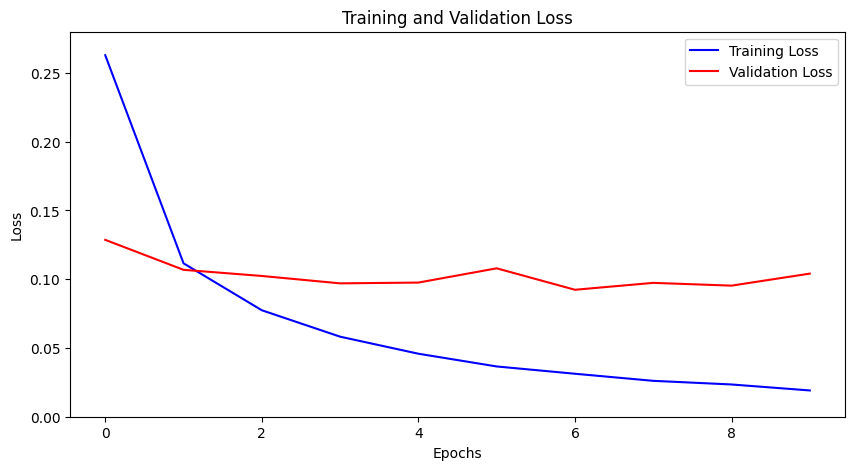

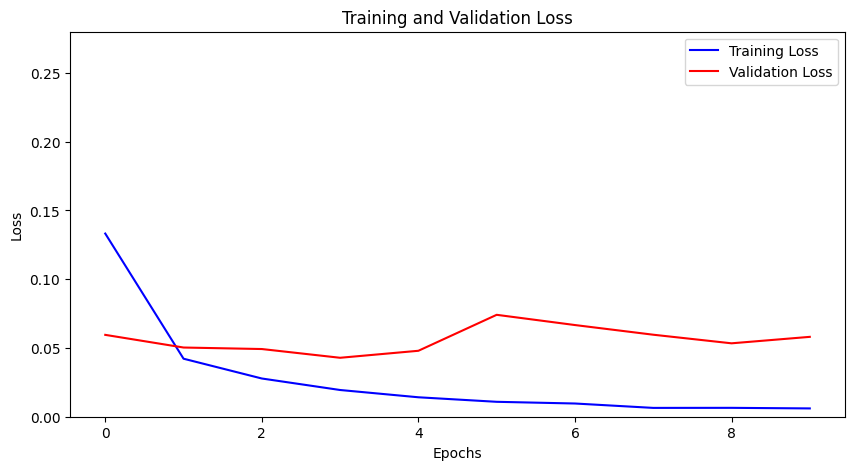

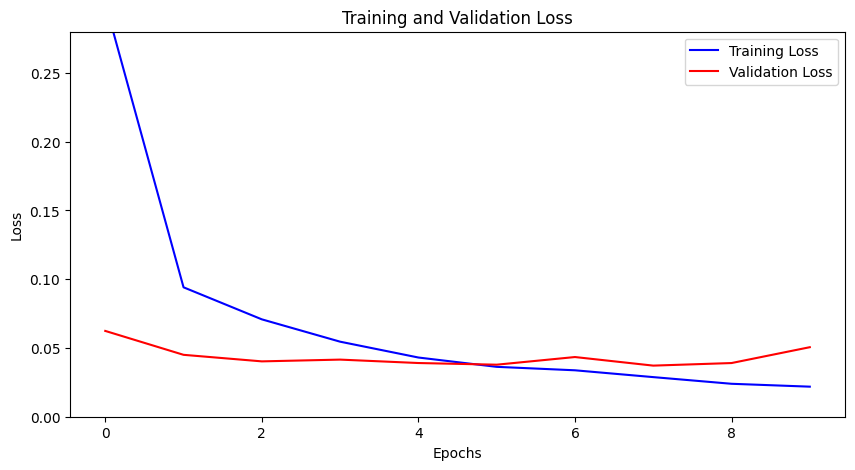

In [31]:
plot_training_test_loss(model_1_results[3])
plot_training_test_loss(model_2_results[3])
plot_training_test_loss(model_3_results[3])
plot_training_test_loss(model_4_results[3])

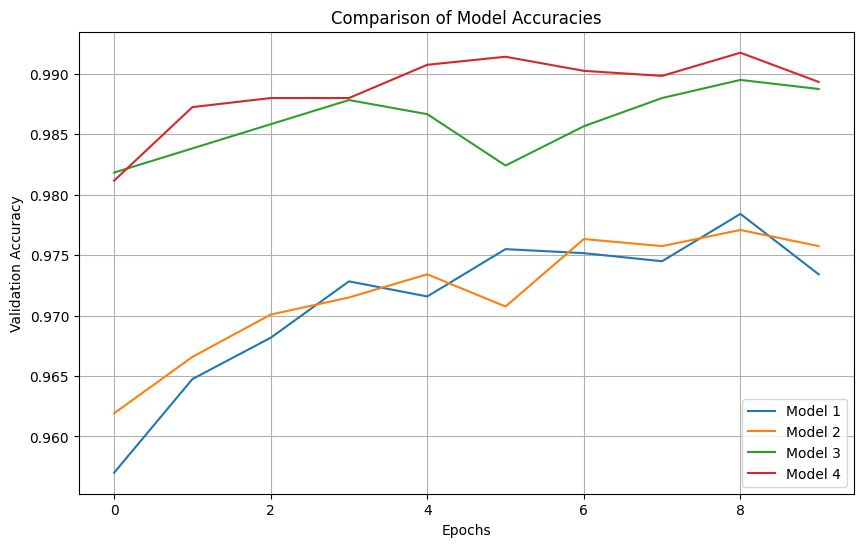

Model 1 Test Accuracy: 97.41%
Model 2 Test Accuracy: 97.63%
Model 3 Test Accuracy: 99.00%
Model 4 Test Accuracy: 99.16%


In [33]:
# Set four different models

# model_x_results = [model, x_test, y_test, history, test_loss, test_accuracy, train_time]

model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]
models = [model_1_results[0], model_2_results[0], model_3_results[0], model_4_results[0]]
histories = [model_1_results[3], model_2_results[3], model_3_results[3], model_4_results[3]]
test_accuracies = [model_1_results[5], model_2_results[5], model_3_results[5], model_4_results[5]]

# Plot the accuracy of the four models
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(histories[i].history['val_accuracy'], label=f'{model_names[i]}')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Model Accuracies')
plt.legend()
plt.grid(True)
plt.show()

# Print the test accuracies
for i, test_acc in enumerate(test_accuracies):
    print(f'{model_names[i]} Test Accuracy: {test_acc*100:.2f}%')

In [38]:
model4 = model_4_results[0]

# Text summary
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 576)              

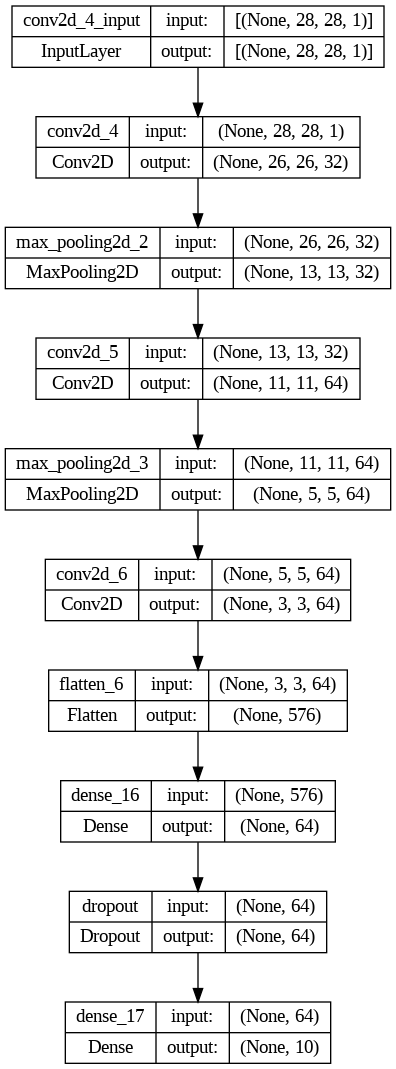

In [39]:
from tensorflow.keras.utils import plot_model

# Generate a graphical summary and save it to an image file
plot_model(model4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Print f1_score from classification report:

> F1-Score: The F1-Score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, especially when there is an uneven distribution of classes. It is calculated as: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report


def get_classification_report(model_results):
    model = model_results[0]
    x_test = model_results[1]
    y_test = model_results[2]

    # Get the predicted labels from the model's output probabilities
    y_pred = np.argmax(model.predict(x_test), axis=-1)

    # Convert multilabel-indicator labels to multiclass labels
    if len(y_test.shape) > 1 and y_test.shape[1] > 1:
        y_test = np.argmax(y_test, axis=-1)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    report = classification_report(y_test, y_pred)
    lines = report.split('\n')
    weighted_avg_line = lines[-2]  # The second-to-last line contains weighted averages

    # Split the line and extract precision, recall, and f1-score
    _, _, precision, recall, f1_score, _ = weighted_avg_line.split()
    return f1_score

print("f1_score for each model:")
print(f'model1: {get_classification_report(model_1_results)}')
print(f'model2: {get_classification_report(model_2_results)}')
print(f'model3: {get_classification_report(model_3_results)}')
print(f'model4: {get_classification_report(model_4_results)}')

f1_score for each model:
313/313 [==============================] - 1s 4ms/step
model1: 0.97
313/313 [==============================] - 3s 10ms/step
model2: 0.98
313/313 [==============================] - 7s 22ms/step
model3: 0.99
313/313 [==============================] - 7s 22ms/step
model4: 0.99


Model 1 results
313/313 [==============================] - 3s 9ms/step


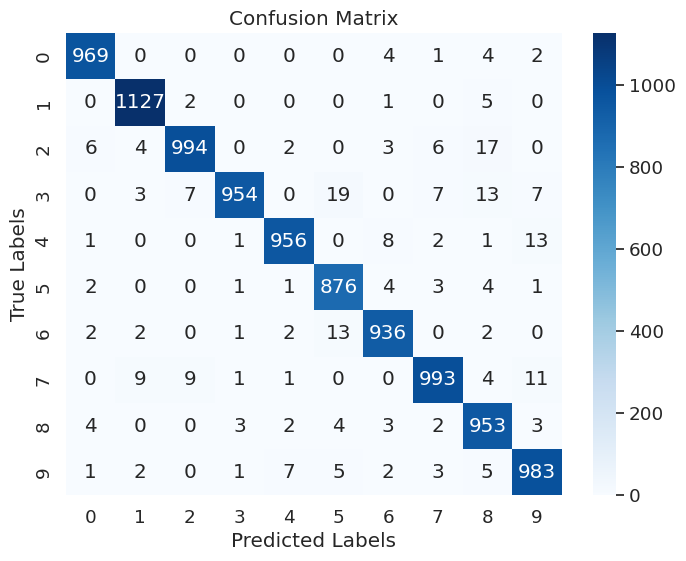

Model 4 results
313/313 [==============================] - 9s 29ms/step


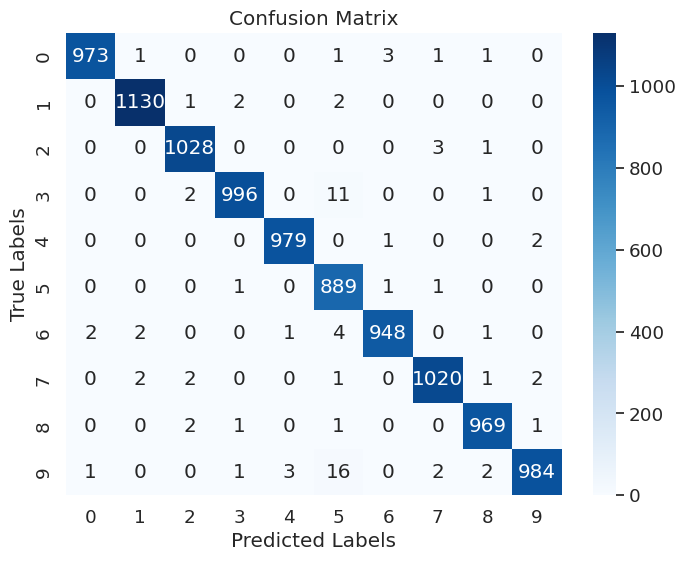

In [54]:
import seaborn as sns

def plot_cm(model_results):
    model = model_results[0]
    x_test = model_results[1]
    y_test = model_results[2]

    # Get the predicted labels from the model's output probabilities
    y_pred = np.argmax(model.predict(x_test), axis=-1)

    # Convert multilabel-indicator labels to multiclass labels
    if len(y_test.shape) > 1 and y_test.shape[1] > 1:
        y_test = np.argmax(y_test, axis=-1)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

print('Model 1 results')
plot_cm(model_1_results)
print('Model 4 results')
plot_cm(model_4_results)